In [1]:
import pandas as pd
import numpy as np
import string, os
import matplotlib.pyplot as plt
import spacy
import re
import glob

from wordcloud import WordCloud
from PIL import Image

In [3]:
from google.colab import drive # Se connecter a google drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
grimms = sorted(glob.glob('/content/drive/My Drive/projet-TIA/dataset/Conte-de-grimms/*'))

In [5]:
andersen = sorted(glob.glob('/content/drive/My Drive/projet-TIA/dataset/andersen/*'))

In [6]:
grimms_en = sorted(glob.glob('/content/drive/My Drive/projet-TIA/dataset/Grimms_anglais/*'))

In [7]:
andersen_en = sorted(glob.glob('/content/drive/My Drive/projet-TIA/dataset/Andersen_anglais/*'))

# Fonction Wordcloud des mots les plus frequent dans chaques histoires

In [8]:
def plotWordFrequency(input):
  text=""
  for book in input:
    with open(book) as f:
      print('Reading', book.split('/')[-1])
      text = f.read()
      #create the wordcloud object
      exclure_mots = ['d', 'du', 'de', 'la', 'des', 'le', 'et', 'est', 'elle', 'une', 'en', 'que', 'aux', 'qui', 'ces', 'les', 'dans', 'sur', 'l', 'un', 'pour', 'par', 'il', 'ou', 'à', 'ce', 'a', 'sont', 'cas', 'plus', 'leur', 'se', 's', 'vous', 'au', 'c', 'aussi',"qu'elle" 'toutes', 'autre', 'comme', 'si', 'pa', 'pas', 'qu', "qu'il", 'avec', 'lui', 'ne', "c'est", "son",'avait']
      wordcloud = WordCloud(background_color='white',max_words = 50).generate(text)
      #display the cloud
      plt.imshow(wordcloud)
      plt.axis('off')
      plt.show()

# Mots les plus fréquent

## Conte grimms en français

In [ ]:
grimms_wordcloud_fr = plotWordFrequency(grimms)
grimms_wordcloud_fr

## Conte Grimms en anglais

In [ ]:
grimms_wordcloud_en = plotWordFrequency(grimms_en)
grimms_wordcloud_en

## Conte d'Andersen en français

In [ ]:
andersen_wordcloud_fr = plotWordFrequency(andersen)
andersen_wordcloud_fr

## Conte d'Andersen en anglais

In [ ]:
andersen_wordcloud_en = plotWordFrequency(andersen_en)
andersen_wordcloud_en

# Creation des dataframes

In [9]:
def create_df(input):
  story = []
  name = []
  for book in input:
    with open(book) as f:
      text = f.read()
      story.append(text)
      name.append(book.split('/')[-1])
  df = pd.DataFrame({'story':story, 'name_story':name})
  return df

In [10]:
df_grimms_en = create_df(grimms_en)


In [11]:
df_andersen_en = create_df(andersen_en)


In [12]:
df_grimms_fr = create_df(grimms)


In [13]:
df_andersen_fr = create_df(andersen)


# Fonction moyenne de caractère par histoire

In [14]:
def count_char(books):
  caractere = []
  name = []
  for book in books:
        with open(book) as f:
          text = f.read()
          caractere.append(len(text))
          name.append(book.split('/')[-1])
  df = pd.DataFrame({'nb_caractere':caractere, 'histoire':name})
  return df

In [34]:
def plot_characters(x,y):
  #plt.figure(figsize=(15,10))
  plt.barh(x, y)
  plt.xlabel('Histoires',fontsize=20)
  plt.xticks(rotation=90)
  plt.ylabel('Nombre de caractères', fontsize=20)
  plt.title('Nombre de caractères par histoires', fontsize=20)
  for index,data in enumerate(y):
      plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20),ha='center', va='bottom') #rotation=90 )
  plt.tight_layout()
  plt.show()


# Fonction de nombres de mots par histoire 

In [16]:
def count_word(books):
  words = []
  name = []
  for book in books:
    with open(book) as f:
      text = f.read()
      words.append(len(text.split()))
      name.append(book.split('/')[-1])
  df = pd.DataFrame({'nb_mots':words, 'histoire':name})
  return df

In [35]:
def plot_words(x,y):
  #plt.figure(figsize=(15,10))
  plt.barh(x, y)
  plt.xlabel('Histoires',fontsize=20)
  plt.xticks(rotation=90)
  plt.ylabel('Nombre de mots', fontsize=20)
  plt.title('Nombre de mots par histoires', fontsize=20)
  for index,data in enumerate(y):
      plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20),ha='center', va='bottom') #rotation=90 )
  plt.tight_layout()
  plt.show()

# Création des dataframe avec le nombre de mots et de caractere

In [22]:
df_chars_andersen_en = count_char(andersen_en)
df_chars_andersen_en

,nb_caractere,histoire
0,13980,"eng_""Beautiful"".txt"
1,1976,"eng_""Dance,_dance,_doll_of_mine!"".txt"
2,14599,"eng_""Something"".txt"
3,8385,eng_A_cheerful_temper.txt
4,5932,eng_A_leaf_from_heaven.txt
...,...,...
151,28704,eng_What_old_Johanne_told.txt
152,6706,eng_What_one_can_invent.txt
153,10670,eng_What_the_old_man_does_is_always_right.txt
154,5439,eng_What_the_whole_family_said.txt


In [23]:
df_chars_grimms_en = count_char(grimms_en)
df_chars_grimms_en

,nb_caractere,histoire
0,654,eng_A_riddling_tale.txt
1,11225,eng_All-kinds-of-fur_(Allerleirauh).txt
2,10279,eng_Bearskin.txt
3,812,eng_Brides_on_their_trial.txt
4,21610,eng_Brother_Lustig.txt
...,...,...
196,15843,eng_The_young_giant.txt
197,8571,eng_Thumbling_as_journeyman_(Thumbling's_Trave...
198,11514,eng_Tom_Thumb.txt
199,16486,eng_Trusty_John.txt


In [24]:
df_words_andersen_en = count_word(andersen_en)
df_words_andersen_en

,nb_mots,histoire
0,2538,"eng_""Beautiful"".txt"
1,379,"eng_""Dance,_dance,_doll_of_mine!"".txt"
2,2789,"eng_""Something"".txt"
3,1587,eng_A_cheerful_temper.txt
4,1120,eng_A_leaf_from_heaven.txt
...,...,...
151,5472,eng_What_old_Johanne_told.txt
152,1275,eng_What_one_can_invent.txt
153,2083,eng_What_the_old_man_does_is_always_right.txt
154,1022,eng_What_the_whole_family_said.txt


In [25]:
df_words_grimms_en  = count_word(grimms_en)
df_words_grimms_en


,nb_mots,histoire
0,131,eng_A_riddling_tale.txt
1,2177,eng_All-kinds-of-fur_(Allerleirauh).txt
2,1988,eng_Bearskin.txt
3,155,eng_Brides_on_their_trial.txt
4,4181,eng_Brother_Lustig.txt
...,...,...
196,3097,eng_The_young_giant.txt
197,1622,eng_Thumbling_as_journeyman_(Thumbling's_Trave...
198,2287,eng_Tom_Thumb.txt
199,3145,eng_Trusty_John.txt


In [26]:
df_chars_andersen_fr = count_char(andersen)
df_chars_andersen_fr

,nb_caractere,histoire
0,14271,"fre_""Something"".txt"
1,7023,fre_Clumsy_Hans.txt
2,13402,fre_Everything_in_its_proper_place.txt
3,6220,fre_Five_peas_from_a_pod.txt
4,19157,fre_Little_Claus_and_big_Claus.txt
5,13951,fre_Little_Ida's_flowers.txt
6,20279,"fre_Ole-Luk-Oie,_the_Dream-God.txt"
7,4746,fre_Pen_and_inkstand.txt
8,28589,fre_Soup_from_a_sausage_skewer.txt
9,20076,fre_The_Nightingale.txt


In [27]:
df_chars_grimms_fr = count_char(grimms)
df_chars_grimms_fr

,nb_caractere,histoire
0,837,fre_A_riddling_tale.txt
1,12372,fre_Bearskin.txt
2,971,fre_Brides_on_their_trial.txt
3,5751,fre_Cat_and_mouse_in_partnership.txt
4,14680,fre_Cinderella.txt
...,...,...
110,5593,fre_The_wolf_and_the_seven_young_kids.txt
111,6631,fre_The_wonderful_musician.txt
112,15381,fre_The_young_giant.txt
113,11207,fre_Tom_Thumb.txt


In [28]:
df_words_andersen_fr = count_word(andersen)
df_words_andersen_fr

,nb_mots,histoire
0,2493,"fre_""Something"".txt"
1,1282,fre_Clumsy_Hans.txt
2,2379,fre_Everything_in_its_proper_place.txt
3,1129,fre_Five_peas_from_a_pod.txt
4,3418,fre_Little_Claus_and_big_Claus.txt
5,2455,fre_Little_Ida's_flowers.txt
6,3530,"fre_Ole-Luk-Oie,_the_Dream-God.txt"
7,807,fre_Pen_and_inkstand.txt
8,4939,fre_Soup_from_a_sausage_skewer.txt
9,3332,fre_The_Nightingale.txt


In [29]:
df_words_grimms_fr  = count_word(grimms)
df_words_grimms_fr

,nb_mots,histoire
0,136,fre_A_riddling_tale.txt
1,2253,fre_Bearskin.txt
2,172,fre_Brides_on_their_trial.txt
3,1018,fre_Cat_and_mouse_in_partnership.txt
4,2573,fre_Cinderella.txt
...,...,...
110,991,fre_The_wolf_and_the_seven_young_kids.txt
111,1171,fre_The_wonderful_musician.txt
112,2855,fre_The_young_giant.txt
113,2054,fre_Tom_Thumb.txt


# Création du dataframe global

In [30]:
df_grimms_en['nb_caractere'] = df_chars_grimms_en['nb_caractere']
df_grimms_en['nb_mots'] = df_words_grimms_en['nb_mots']

df_andersen_en['nb_caractere'] = df_chars_andersen_en['nb_caractere']
df_andersen_en['nb_mots'] = df_words_andersen_en['nb_mots']

In [31]:
df_grimms_fr['nb_caractere'] = df_chars_grimms_fr['nb_caractere']
df_grimms_fr['nb_mots'] = df_words_grimms_fr['nb_mots']

df_andersen_fr['nb_caractere'] = df_chars_andersen_fr['nb_caractere']
df_andersen_fr['nb_mots'] = df_words_andersen_fr['nb_mots']

# Statistique descriptives

## Graphiques nombres de caracteres par histoire 

In [32]:
# Echantillons des 10 premières histoires
samples_grimms_fr = df_grimms_fr[:10]
samples_andersen_fr = df_andersen_fr[:10]
samples_grimms_en = df_grimms_en[:10]
samples_andersen_en = df_andersen_en[:10]

## Nombre de caractères Grimms français

In [36]:
num_chars_grimm_fr = plot_characters(samples_grimms_fr['name_story'],samples_grimms_fr['nb_caractere'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  # Remove the CWD from sys.path while we load stuff.


ValueError: ignored

<Figure size 432x288 with 1 Axes>

## Nombre de caractères Grimms anglais

In [37]:
num_chars_grimm_en = plot_characters(samples_grimms_en['name_story'],samples_grimms_en['nb_caractere'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  # Remove the CWD from sys.path while we load stuff.


ValueError: ignored

<Figure size 432x288 with 1 Axes>

## Nombre de caractères Andersen français

In [38]:
num_chars_andersen_fr = plot_characters(samples_andersen_fr['name_story'],samples_andersen_fr['nb_caractere'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  # Remove the CWD from sys.path while we load stuff.


ValueError: ignored

<Figure size 432x288 with 1 Axes>

## Nombre de caractère Andersen anglais

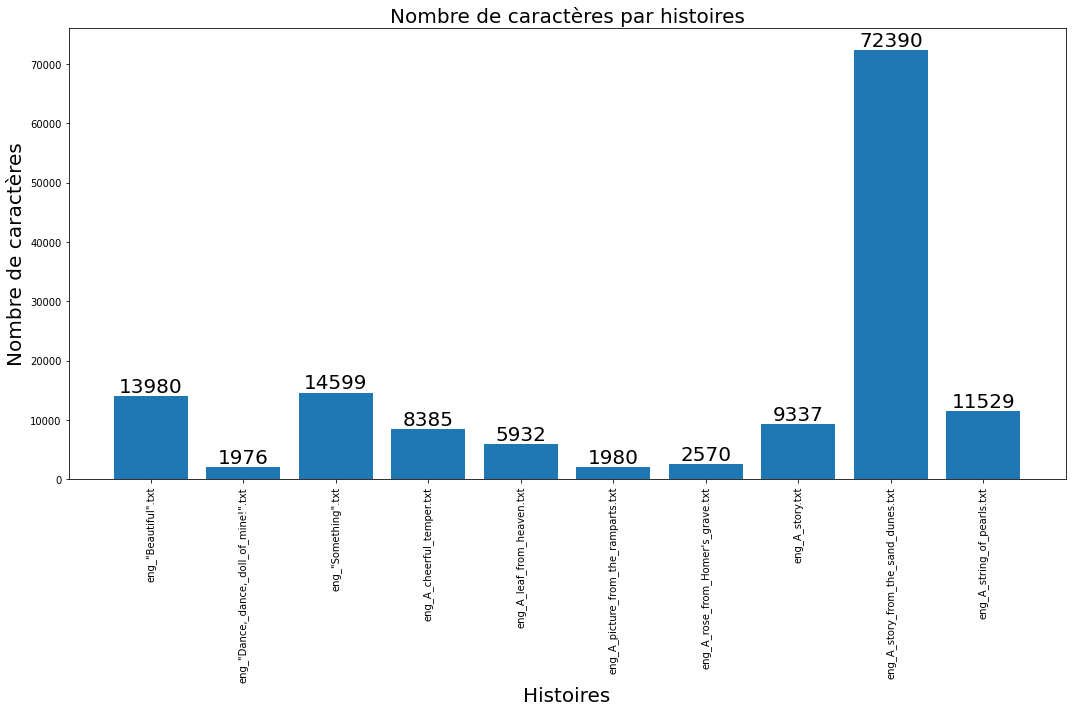

In [ ]:
num_chars_andersen_en = plot_characters(samples_andersen_en['name_story'],samples_andersen_en['nb_caractere'])

# Graphiques nombres de mots par histoire

## Nombre de mots Grimms français

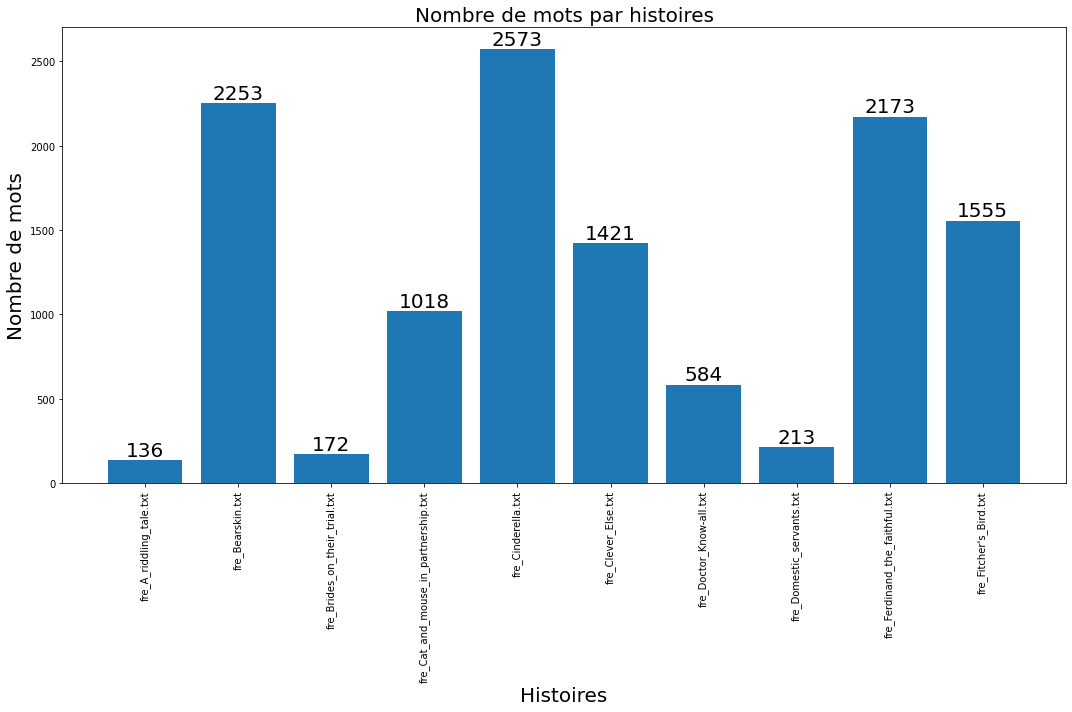

In [ ]:
num_words_grimm_fr = plot_words(samples_grimms_fr['name_story'],samples_grimms_fr['nb_mots'])

## Nombre de mots Grimms anglais

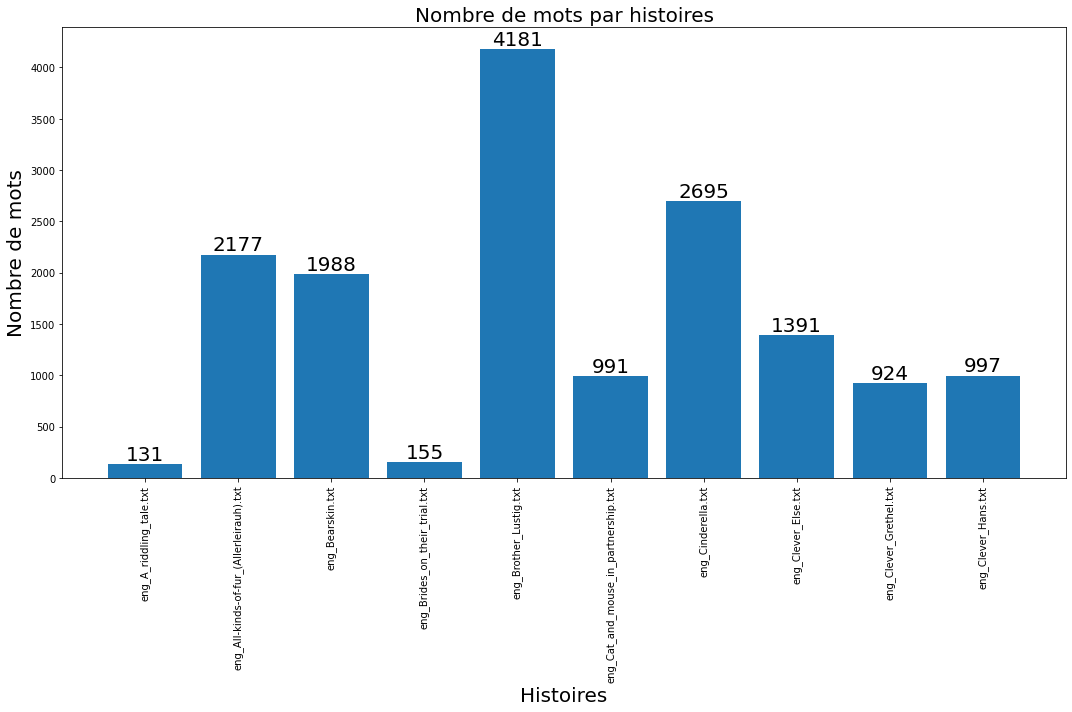

In [ ]:
num_words_grimm_en = plot_words(samples_grimms_en['name_story'],samples_grimms_en['nb_mots'])

## Nombre de mots Andersen français

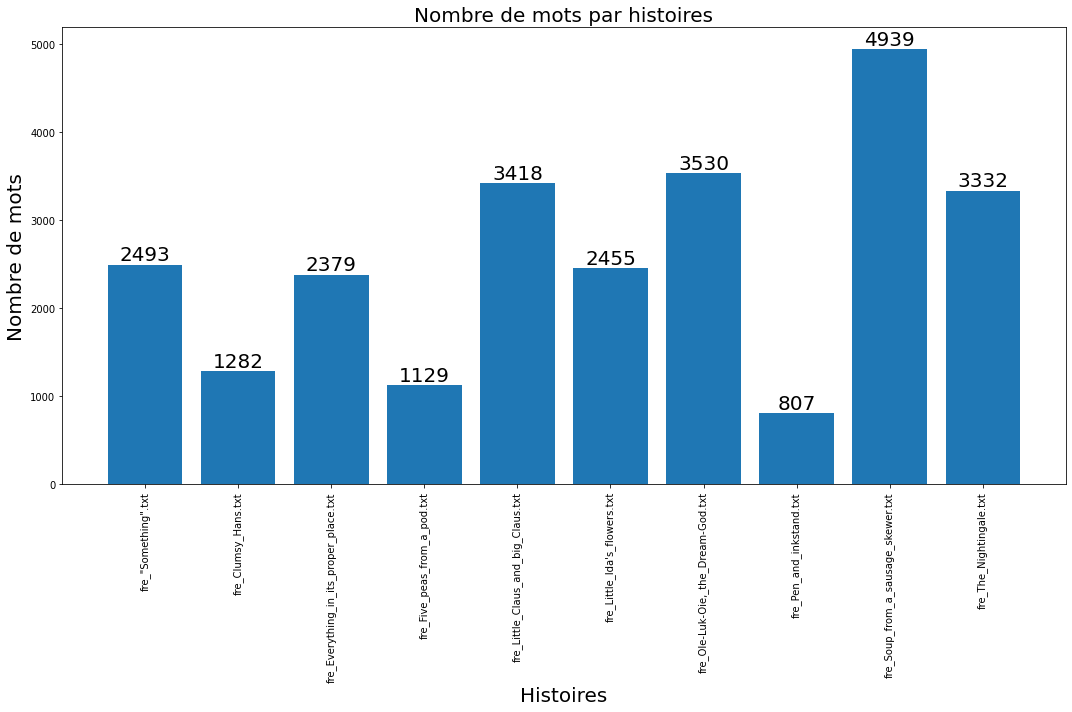

In [ ]:
num_words_andersen_fr = plot_words(samples_andersen_fr['name_story'],samples_andersen_fr['nb_mots'])

## Nombre de mots Andersen anglais

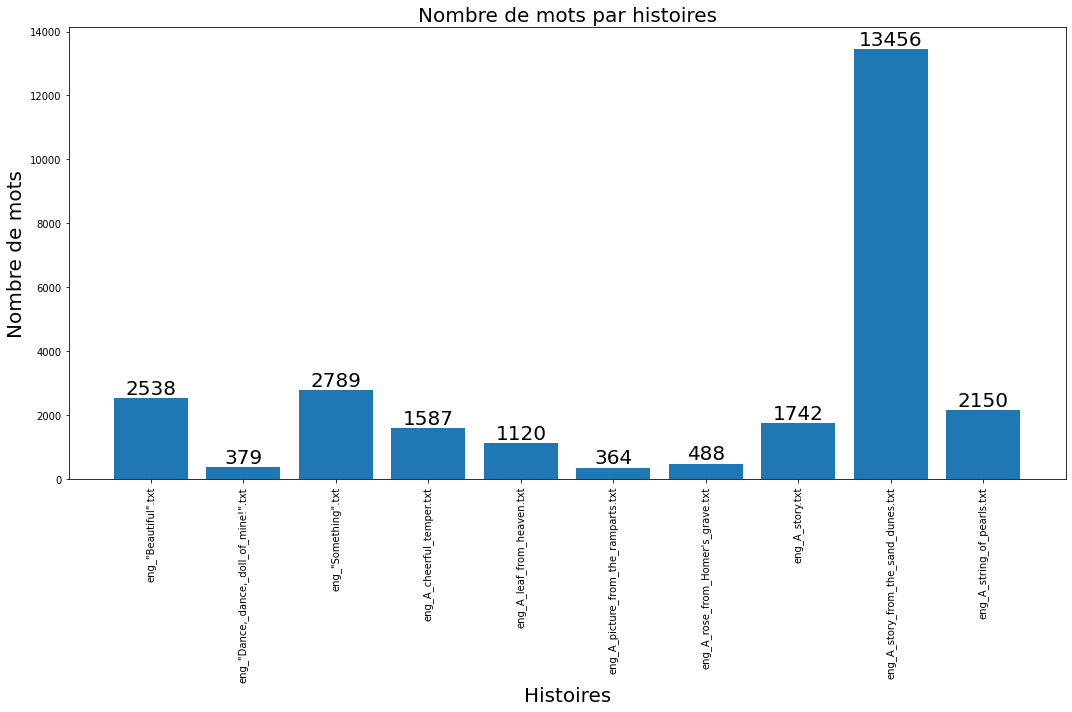

In [ ]:
num_words_andersen_en = plot_words(samples_andersen_en['name_story'],samples_andersen_en['nb_mots'])

# Statistique descriptive des datasets

## Andersen Français

In [ ]:
df_andersen_fr.describe()

,nb_caractere,nb_mots
count,53.000000,53.000000
mean,14223.943396,2483.924528
std,11167.577593,1957.670042
min,2020.000000,350.000000
25%,6871.000000,1209.000000
50%,10338.000000,1848.000000
75%,18734.000000,3251.000000
max,63286.000000,11202.000000


# Andersen anglais

In [ ]:
df_andersen_en.describe()
print("Statistique descriptives des contes d'Andersen en anglais: \n")
df_andersen_en.describe()

Statistique descriptives des contes d'Andersen en anglais: 



,nb_caractere,nb_mots
count,156.000000,156.00000
mean,14177.288462,2656.25641
std,14777.788292,2742.70214
min,1916.000000,364.00000
25%,5238.500000,978.50000
50%,9014.500000,1733.50000
75%,17818.500000,3313.50000
max,101291.000000,18673.00000


## Grimms français

In [ ]:
df_grimms_fr.describe()

,nb_caractere,nb_mots
count,115.000000,115.000000
mean,7525.339130,1347.669565
std,5077.688742,913.776267
min,803.000000,136.000000
25%,3329.500000,593.500000
50%,6799.000000,1230.000000
75%,10635.500000,1953.500000
max,21650.000000,3879.000000


## Grimms en anglais

In [ ]:
df_grimms_en.describe()
#print("Statistique descriptives des contes de Grimms en anglais: \n")

,nb_caractere,nb_mots
count,201.000000,201.000000
mean,7148.532338,1385.651741
std,5555.426148,1075.649933
min,654.000000,131.000000
25%,3023.000000,585.000000
50%,6095.000000,1156.000000
75%,10279.000000,1988.000000
max,44500.000000,8575.000000
